In [2]:
%load_ext autoreload
%autoreload 2


In [3]:
import scanpy as sc
import bbknn

/home/ec2-user/miniconda3/envs/concord_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
# load the data
adata = sc.read_h5ad('../data/dkd_Wilson/dkd_Wilson_final.h5ad')

In [5]:
adata

AnnData object with n_obs × n_vars = 39176 × 36398
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'suspension_uuid', 'suspension_type', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'reported_diseases', 'sex_ontology_term_id', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.rpl', 'percent.rps', 'doublet_id', 'nCount_SCT', 'nFeature_SCT', 'seurat_clusters', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes'


In [6]:
bbknn.bbknn(adata, batch_key='sample_uuid')

In [7]:
adata.obsm

AxisArrays with keys: X_harmony, X_pca, X_umap

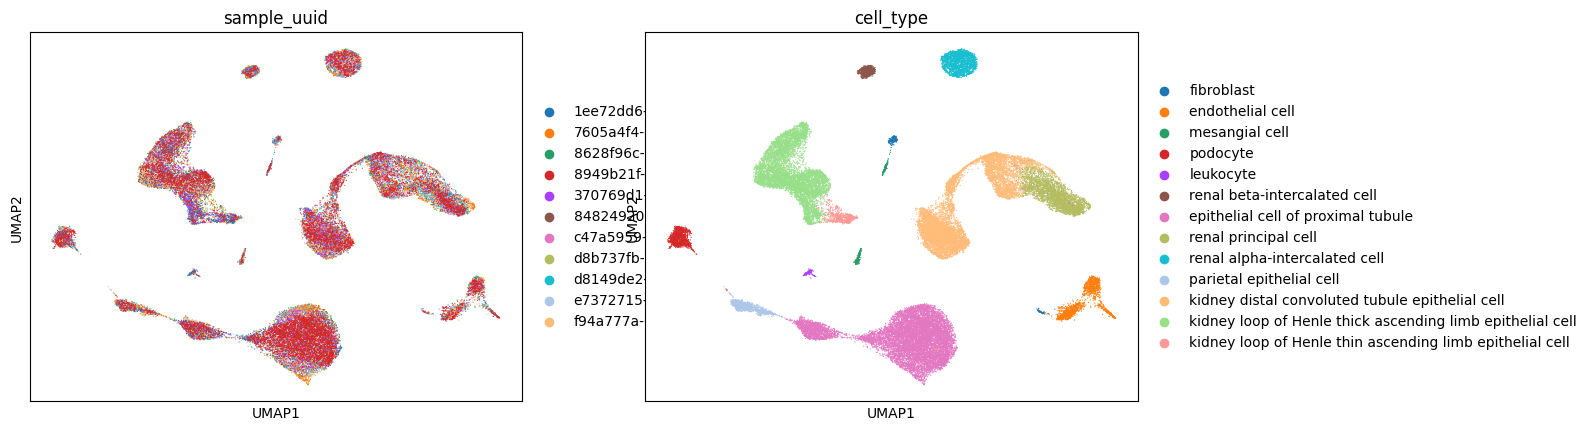

In [8]:
sc.pl.umap(adata, color=['sample_uuid', 'cell_type'])

In [10]:
adata.obs['sample_uuid'].unique()

['d8b737fb-8a38-4a1d-a421-cbc81edddd05', '8628f96c-2d97-4579-951c-044017ef6f0e', 'e7372715-150e-4117-a11b-a88ea56ce5c5', '84824920-47bc-4929-b123-87574944aa37', 'c47a5959-a0ed-4276-8a8d-5f136f1edd29', ..., 'd8149de2-123d-4852-a822-d8aee03b6266', 'f94a777a-0e6c-4361-a4ad-9472f69d46f3', '370769d1-96bd-4392-8ac4-56ab409e69a0', '1ee72dd6-e794-4793-b58b-b763e3bf1fed', '8949b21f-6f57-40c0-8f7b-0d6e9bff05cd']
Length: 11
Categories (11, object): ['1ee72dd6-e794-4793-b58b-b763e3bf1fed', '7605a4f4-e667-4418-85ec-c42e9ab8c761', '8628f96c-2d97-4579-951c-044017ef6f0e', '8949b21f-6f57-40c0-8f7b-0d6e9bff05cd', ..., 'd8b737fb-8a38-4a1d-a421-cbc81edddd05', 'd8149de2-123d-4852-a822-d8aee03b6266', 'e7372715-150e-4117-a11b-a88ea56ce5c5', 'f94a777a-0e6c-4361-a4ad-9472f69d46f3']

In [11]:
adata.obs['donor_id'].unique()

['control_1', 'control_2', 'control_3', 'healthy_4', 'healthy_5', ..., 'diabetic_2', 'diabetic_3', 'diabetic_4', 'diabetic_5', 'healthy_6']
Length: 11
Categories (11, object): ['control_1', 'control_2', 'control_3', 'diabetic_1', ..., 'diabetic_5', 'healthy_4', 'healthy_5', 'healthy_6']

In [13]:
adata.obsm['X_pca'].shape

(39176, 300)

In [17]:
adata.obsm['concord_knn'].shape

(39176, 50)